# Student Performance Indicator

## Life cycle of Machine Learning Project
- Understanding Problem Statement
- Data Gathering
- Data Checks
- Exploratory Data Analysis
- Data Preprocessing
- Model Experimentation
- Final Model selection and Training

## 1. Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2. Data Gathering
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("data\stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Data Checks
    1. Feature types
    2. Null values
    3. Duplicates
    4. Univariate Stats
    5. Categories and value counts.

### 3.1 Feature types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
num_cols = [feature for feature in data.columns if data[feature].dtype != 'O']
categ_cols = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', categ_cols)

Numerical Columns:  ['math_score', 'reading_score', 'writing_score']
Categorical Columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.2 Null values

In [13]:
data.isna().sum(0)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### The data has no Null values, hence no imputation needed.

### 3.3 Duplicates

In [14]:
data.duplicated().sum(0)

0

#### Data has no duplicates.

### 3.4 Univariate Stats

In [15]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. Mean for Math, reading and Writing scores are close to one another, lying between 65-68
2. Standard deviations are also similar - Boxplots will also be similar.
3. Math score has a minimum of 0, while others have non-zero minimum - students do have math phobia.
4. Max score for all 3 sections is 100.

### 3.5 Categorical features

In [18]:
for column in categ_cols:
    print(column)
    print(data[column].value_counts())
    print('\n')

gender
female    518
male      482
Name: gender, dtype: int64


race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64


parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64


lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64


test_preparation_course
none         642
completed    358
Name: test_preparation_course, dtype: int64




Summary
1. Gender feature has only 2 categories - male and feamale.
2. Race_ethnicity has 5 categories - group C is most popular.
3. Parental education has 6 categories - most parents have some college degree, very few have master's degree
4. Lunch has 2 categories - most students opting standard lunch.
5. test_preparation has 2 categories.

## 4. EDA

In [19]:
# combining math, writing and reading scores into total score column and an average column
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average_score'] = data['total_score']/3
# data.drop(['math_score', 'reading_score', 'writing_score'], axis=1, inplace=True)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
math_100 = data[data['math_score'] == 100]['math_score'].count()
reading_100 = data[data['reading_score'] == 100]['reading_score'].count()
writing_100 = data[data['writing_score'] == 100]['writing_score'].count()

print(f'Number of students with full marks in Maths: {math_100}')
print(f'Number of students with full marks in Reading: {reading_100}')
print(f'Number of students with full marks in Writing: {writing_100}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [26]:
# Setting 20 marks as pass mark
math_pass = data[data['math_score'] >20]['math_score'].count()
reading_pass = data[data['reading_score'] >20]['reading_score'].count()
writing_pass = data[data['writing_score'] >20]['writing_score'].count()

print(f'Number of students passed Maths: {math_pass}')
print(f'Number of students passed in Reading: {reading_pass}')
print(f'Number of students passed in Writing: {writing_pass}')

Number of students passed Maths: 996
Number of students passed in Reading: 999
Number of students passed in Writing: 997


### 4.1 Bivariate Analysis

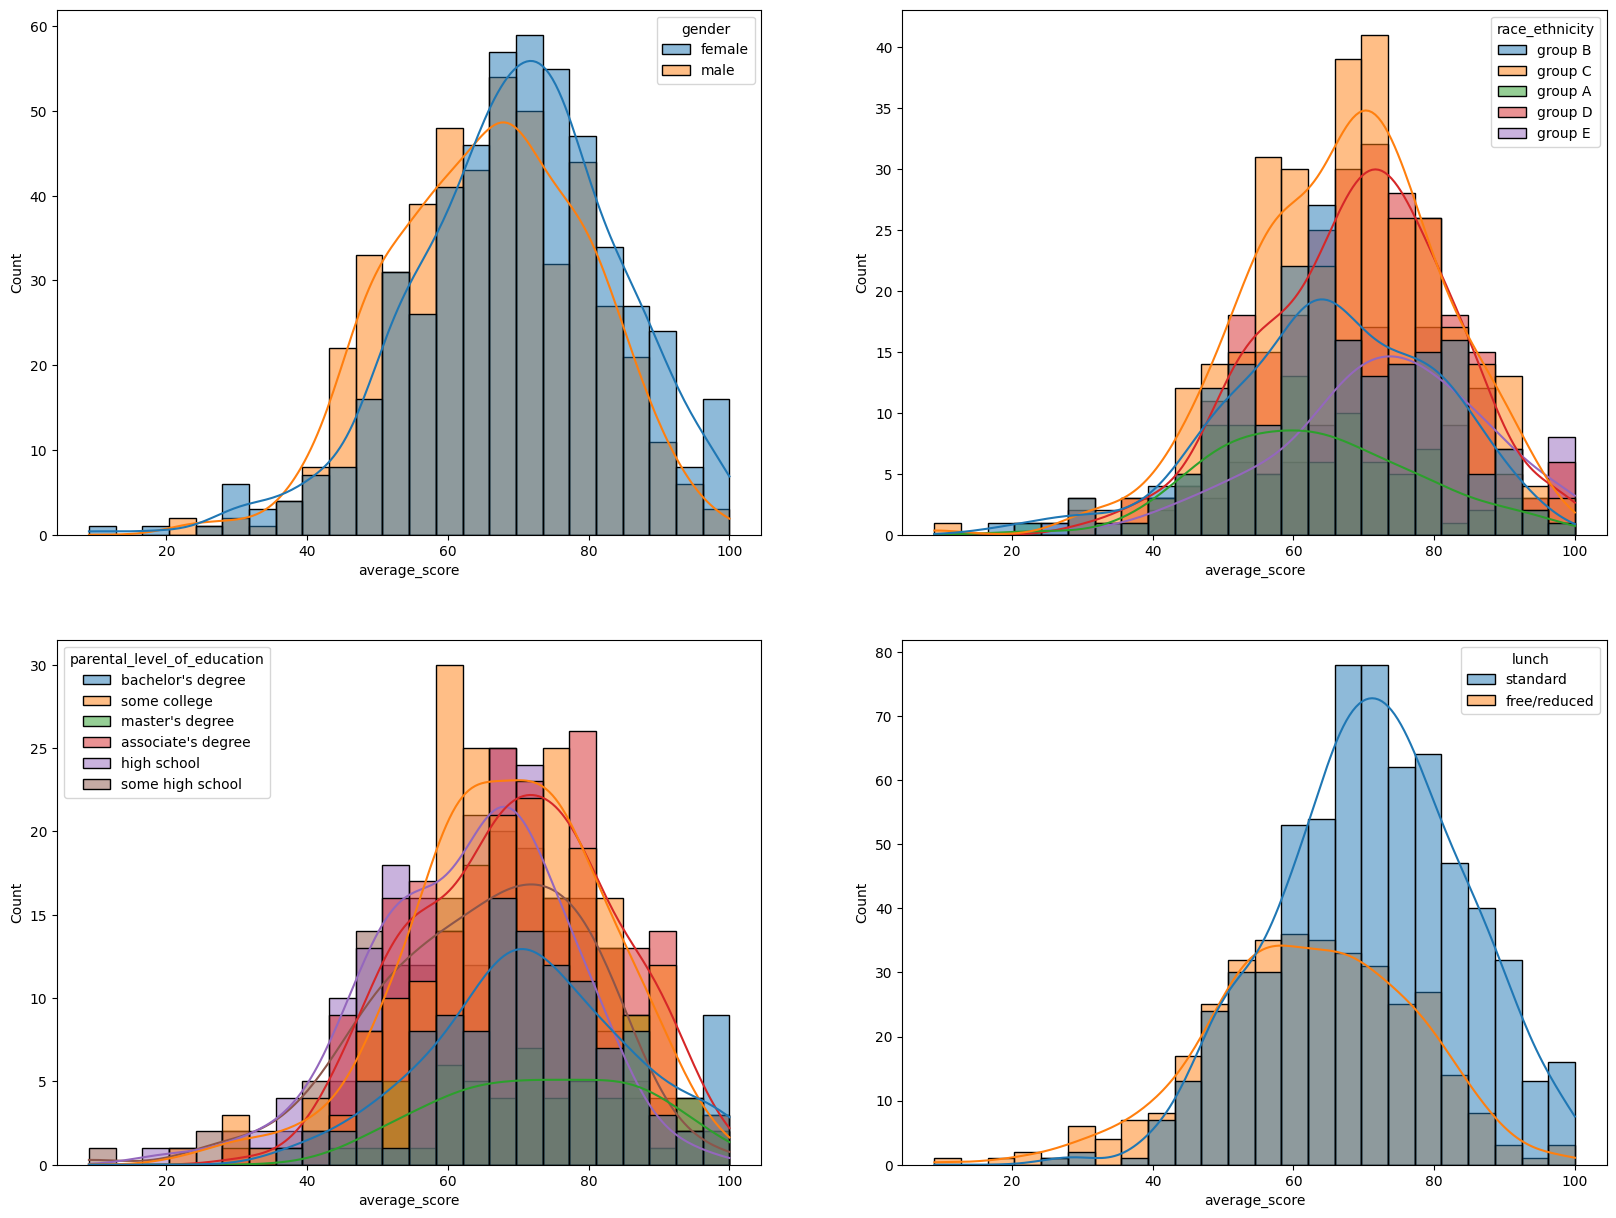

In [40]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.histplot(data=data, x='average_score', hue='gender', kde=True, ax=ax[0,0])
sns.histplot(data=data, x='average_score', hue='race_ethnicity', kde=True, ax=ax[0,1])
sns.histplot(data=data, x='average_score', hue='parental_level_of_education', kde=True, ax=ax[1,0])
sns.histplot(data=data, x='average_score', hue='lunch', kde=True, ax=ax[1,1])
plt.show()


Insights
1. Females have higher average total score then males.
2. Group E ethnicity students have the highest average score.
3. Parental education did not seem to have a considerable impact on average score.
4. Students opted standard lunch scored higher on average.

Text(0.5, 1.0, 'Female students vs Average Score')

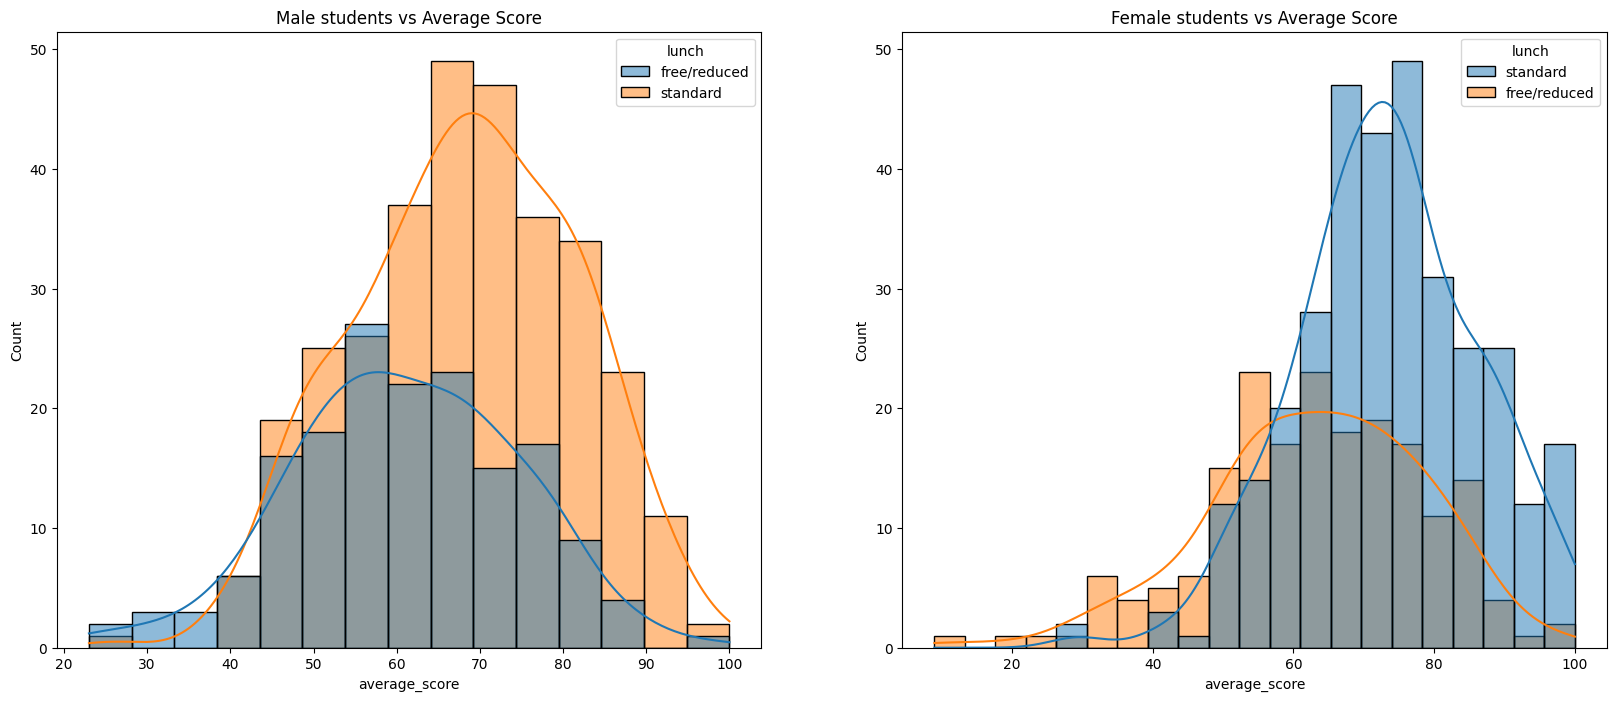

In [46]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data=data[data['gender'] == 'male'], x='average_score', hue='lunch', kde=True, ax=ax[0])
sns.histplot(data=data[data['gender'] == 'female'], x='average_score', hue='lunch', kde=True, ax=ax[1])
ax[0].set_title('Male students vs Average Score')
ax[1].set_title('Female students vs Average Score')

Insight
- Standard lunch positively effected average score irrespective of gender.

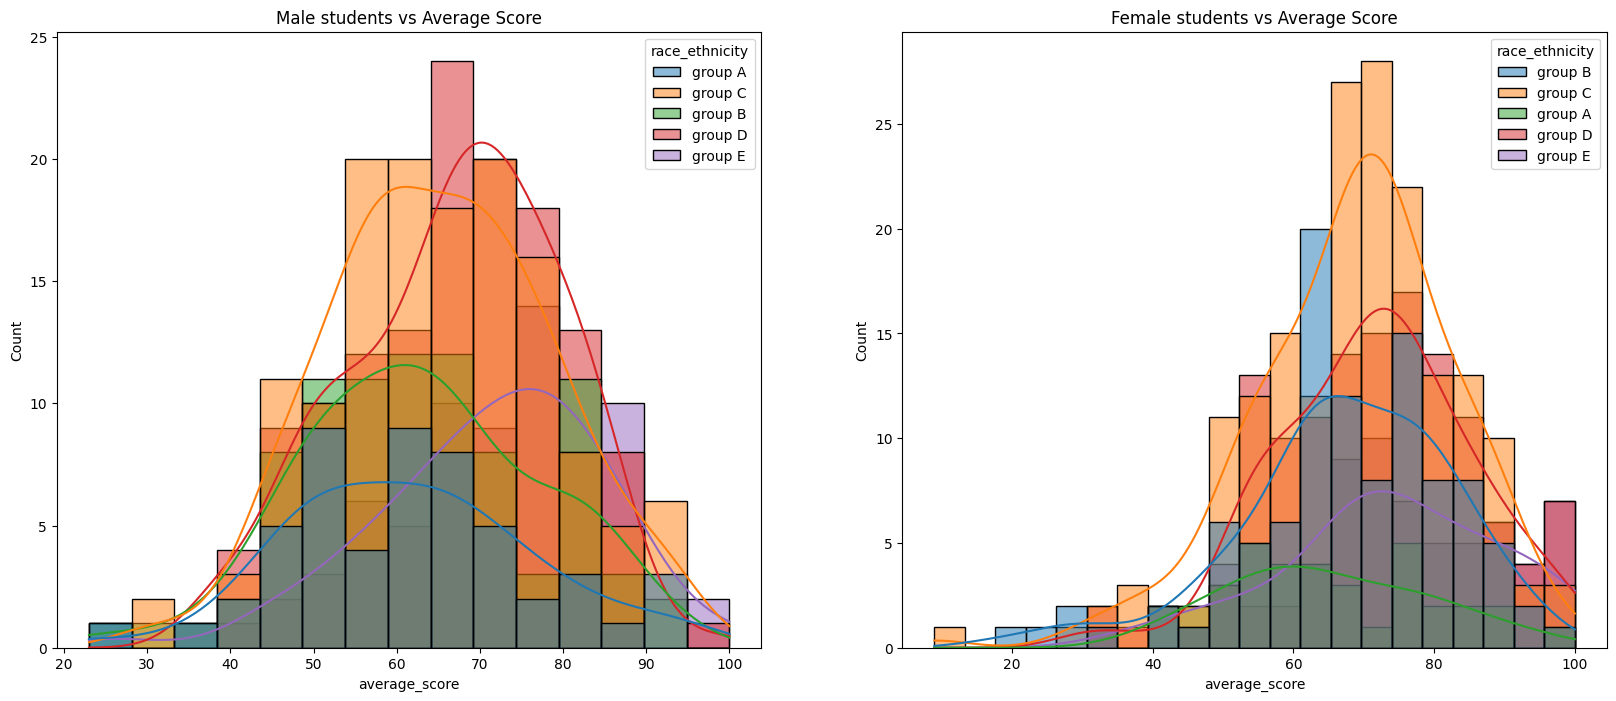

In [45]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data=data[data['gender'] == 'male'], x='average_score', hue='race_ethnicity', kde=True, ax=ax[0])
sns.histplot(data=data[data['gender'] == 'female'], x='average_score', hue='race_ethnicity', kde=True, ax=ax[1])
ax[0].set_title('Male students vs Average Score')
ax[1].set_title('Female students vs Average Score')
fig.show()

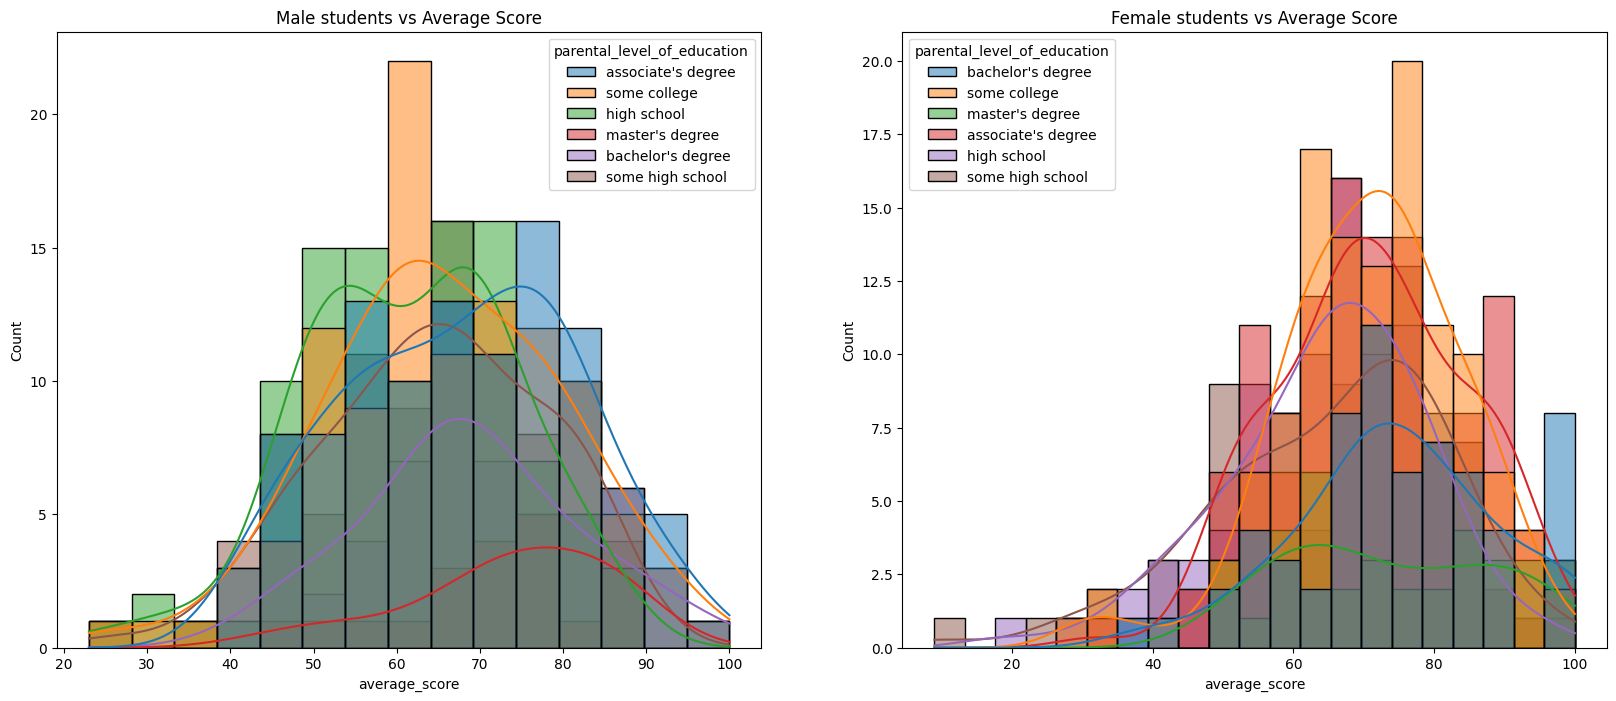

In [48]:
# parental_level_of_education
# test_preparation_course
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data=data[data['gender'] == 'male'], x='average_score', hue='parental_level_of_education', kde=True, ax=ax[0])
sns.histplot(data=data[data['gender'] == 'female'], x='average_score', hue='parental_level_of_education', kde=True, ax=ax[1])
ax[0].set_title('Male students vs Average Score')
ax[1].set_title('Female students vs Average Score')
plt.show()

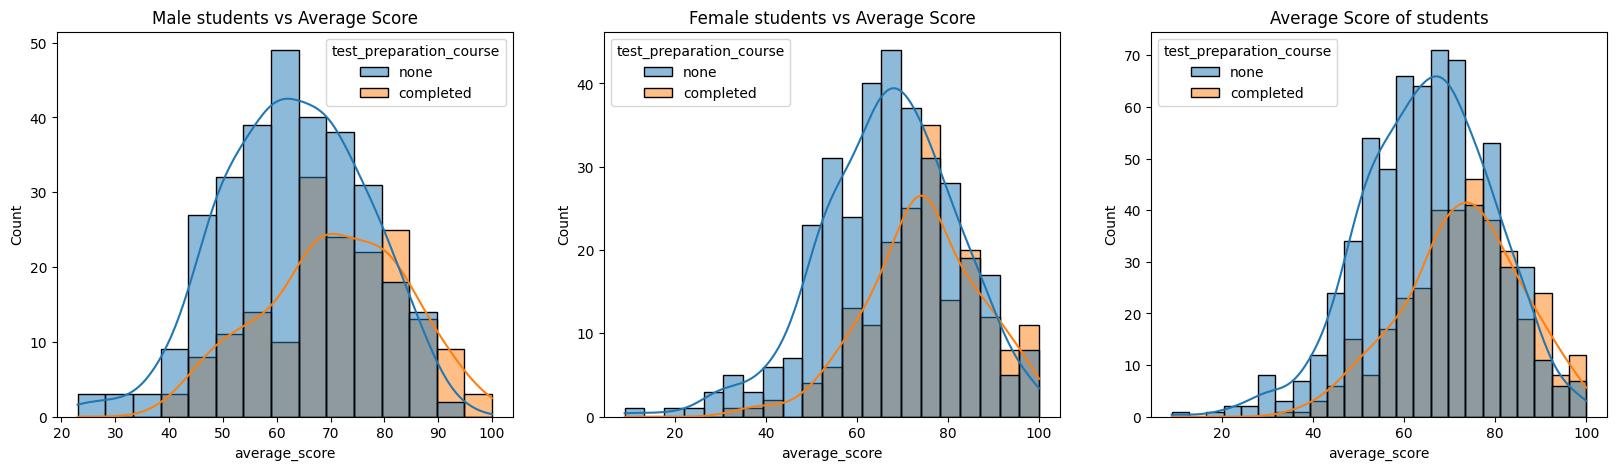

In [50]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(data=data[data['gender'] == 'male'], x='average_score', hue='test_preparation_course', kde=True, ax=ax[0])
sns.histplot(data=data[data['gender'] == 'female'], x='average_score', hue='test_preparation_course', kde=True, ax=ax[1])
sns.histplot(data=data, x='average_score', hue = 'test_preparation_course', kde=True, ax=ax[2])
ax[0].set_title('Male students vs Average Score')
ax[1].set_title('Female students vs Average Score')
ax[2].set_title('Average Score of students')
plt.show()

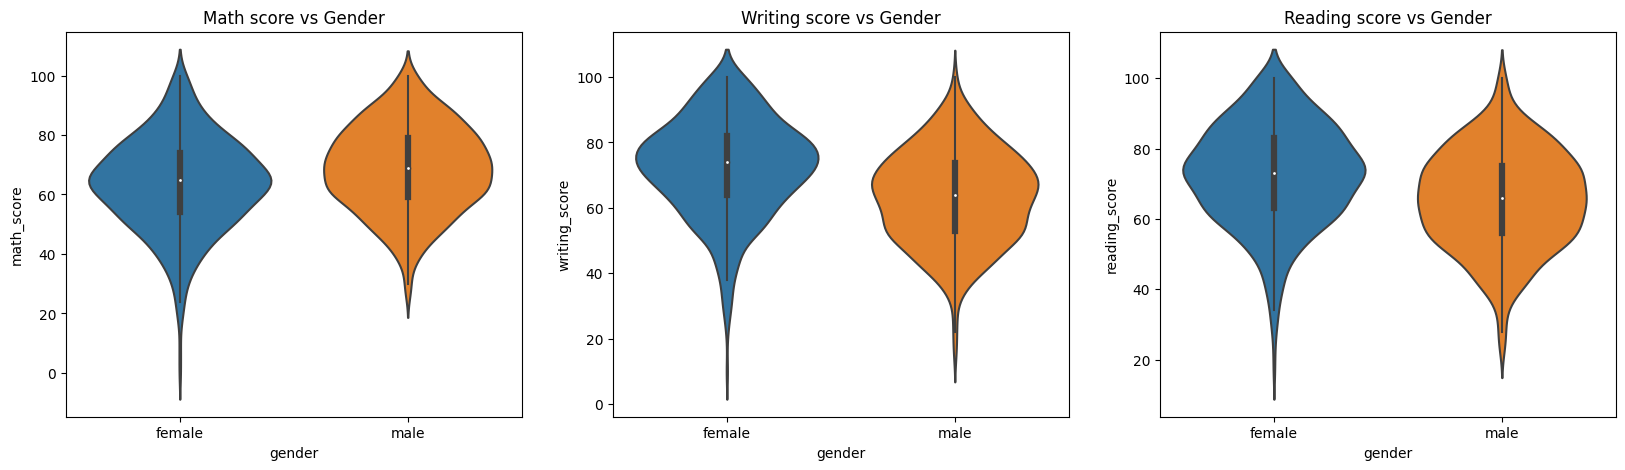

In [57]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.violinplot(data=data, y='math_score', x='gender', ax=ax[0])
ax[0].set_title('Math scores')
sns.violinplot(data=data, x='gender', y='writing_score', ax=ax[1])
ax[1].set_title('Writing scores')
sns.violinplot(data=data, x='gender', y='reading_score', ax=ax[2])
ax[2].set_title('Reading scores')
plt.show()

### 4.2 Multivariate Analysis

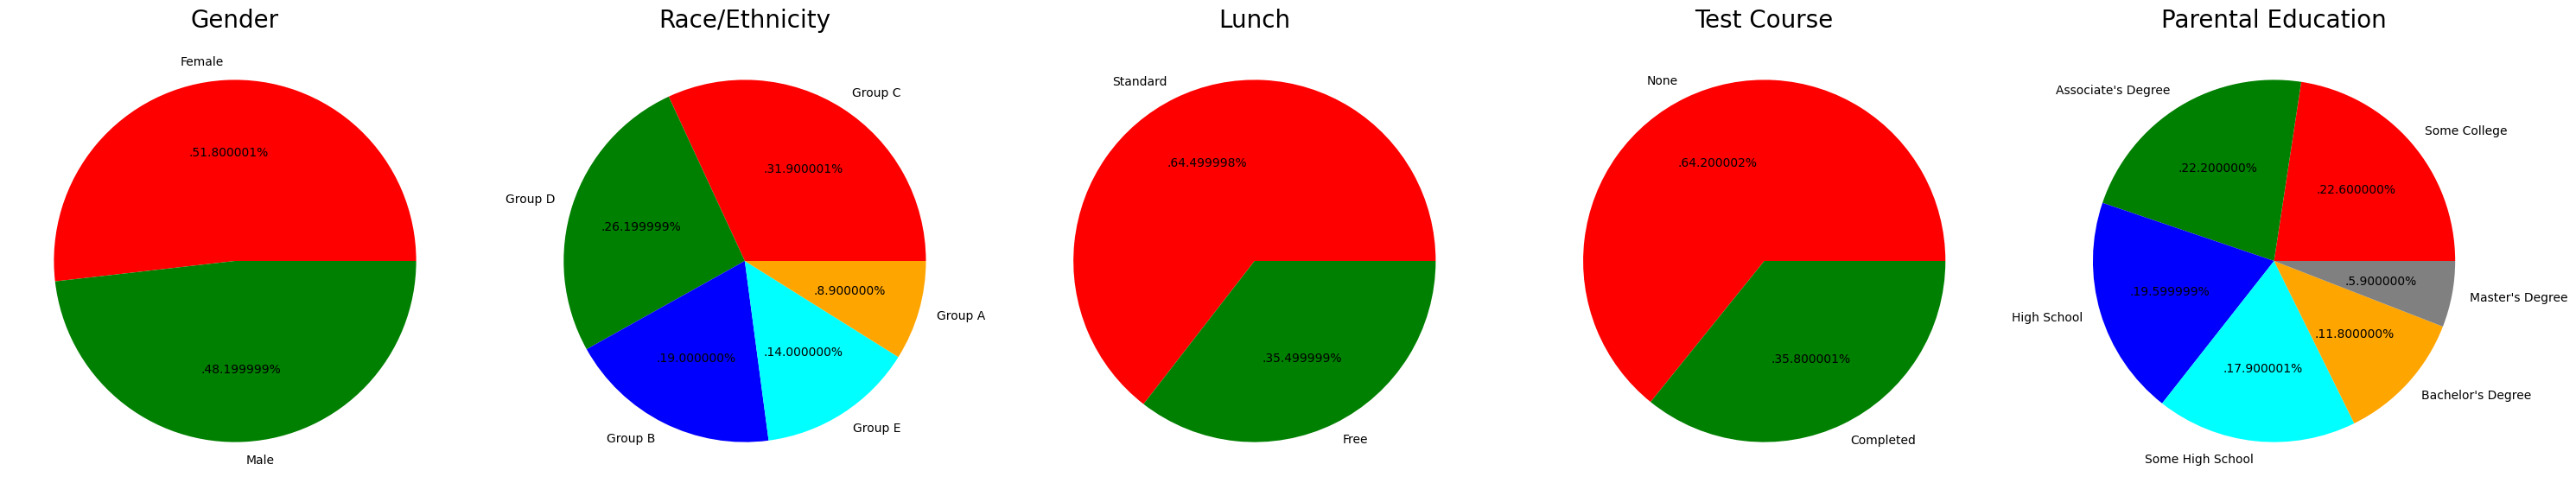

In [62]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

<Axes: xlabel='lunch', ylabel='writing_score'>

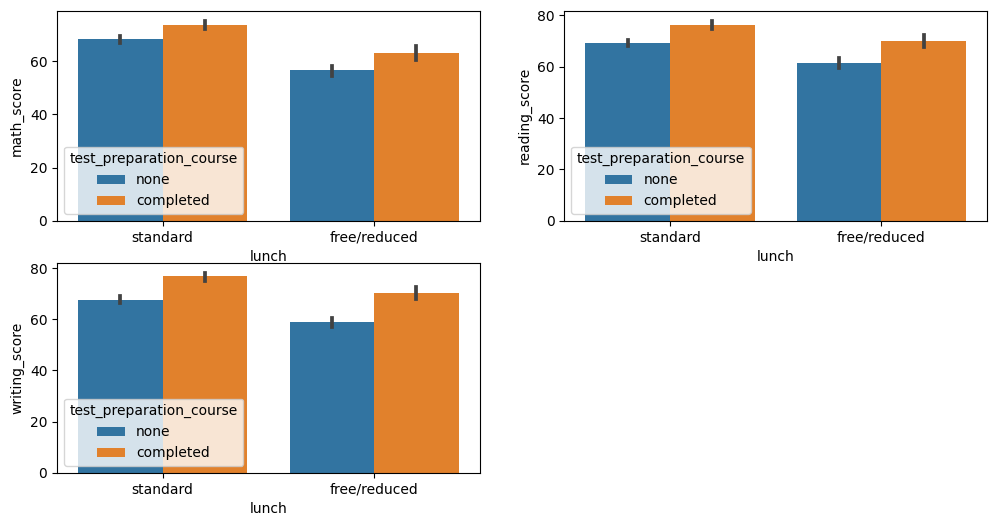

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

### 4.3 Checking Outliers

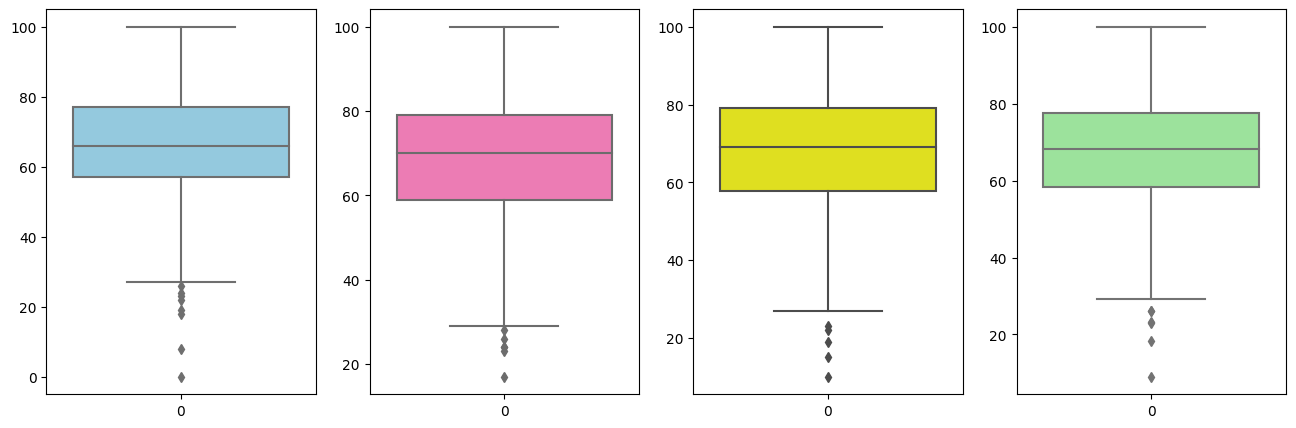

In [64]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average_score'],color='lightgreen')
plt.show()

### 4.4 Multivariate Analysis

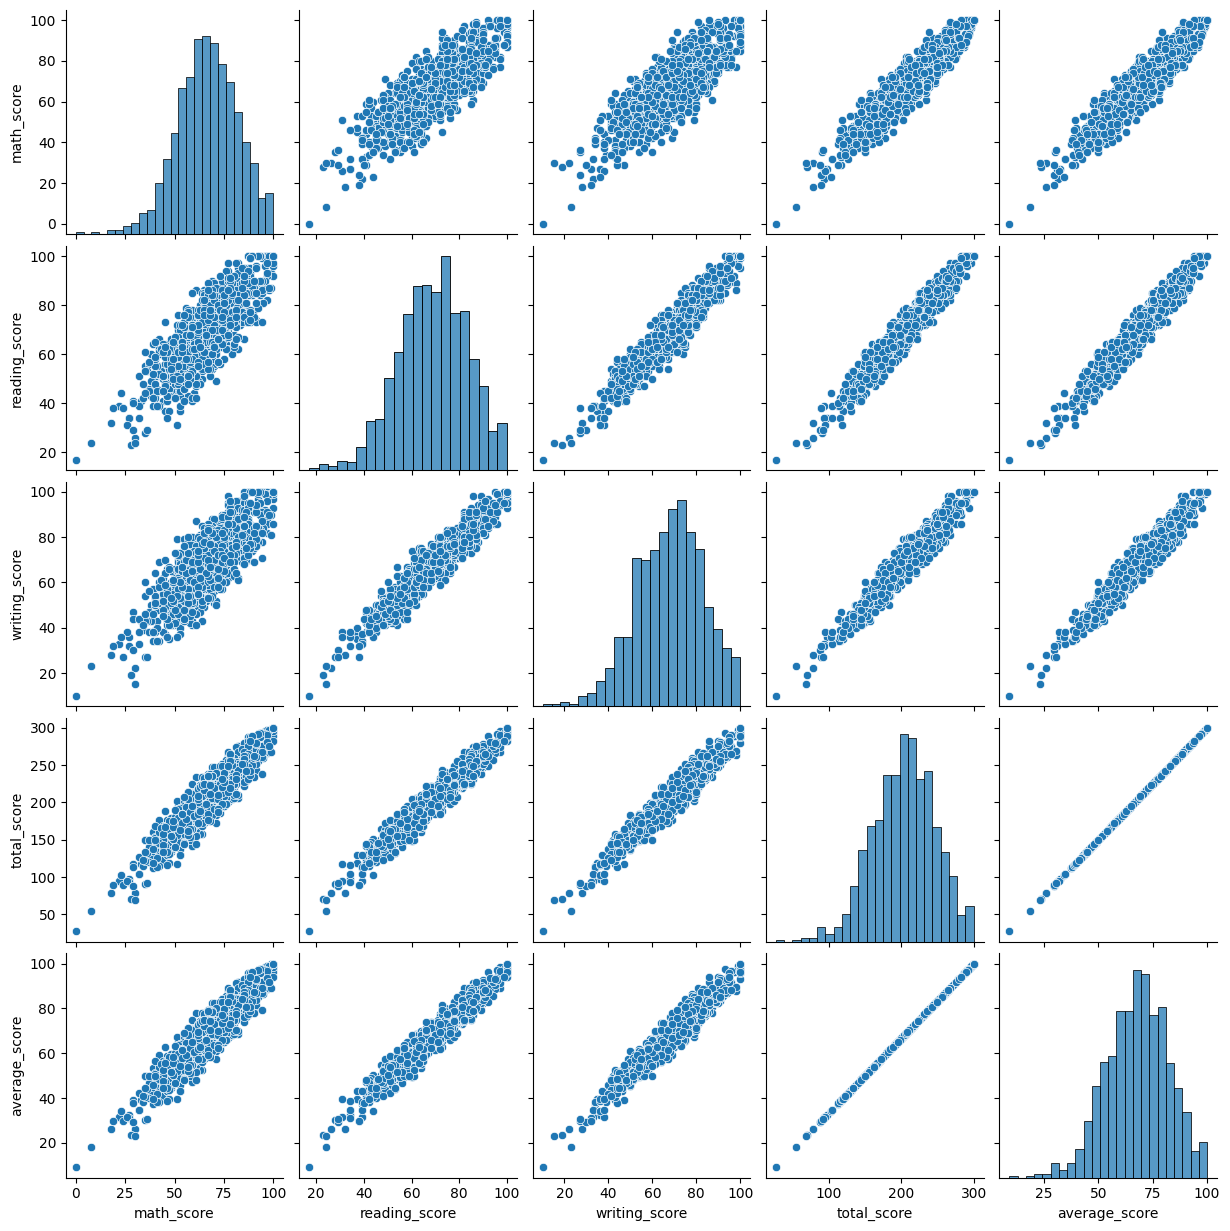

In [67]:
sns.pairplot(data=data)

Insight
- All scores are linearly related